In [14]:
!pip install -q yfinance pandas matplotlib numpy

In [15]:
import yfinance as yf
dat = yf.Ticker("AMZN")

In [16]:
dat = yf.Ticker("AMZN")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo')
dat.option_chain(dat.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN250815C00085000,2025-08-13 19:07:58+00:00,85.0,139.26,0.0,0.0,0.0,0.0,12,126,0.000010,True,REGULAR,USD
1,AMZN250815C00090000,2025-08-11 17:44:55+00:00,90.0,131.25,0.0,0.0,0.0,0.0,35,50,0.000010,True,REGULAR,USD
2,AMZN250815C00095000,2025-08-12 13:57:45+00:00,95.0,124.77,0.0,0.0,0.0,0.0,2,81,0.000010,True,REGULAR,USD
3,AMZN250815C00100000,2025-08-08 15:25:27+00:00,100.0,123.30,0.0,0.0,0.0,0.0,5,617,0.000010,True,REGULAR,USD
4,AMZN250815C00105000,2025-08-13 19:36:14+00:00,105.0,119.78,0.0,0.0,0.0,0.0,1,50,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,AMZN250815C00330000,2025-08-08 17:13:15+00:00,330.0,0.01,0.0,0.0,0.0,0.0,1,229,0.500005,False,REGULAR,USD
63,AMZN250815C00335000,2025-08-11 18:26:04+00:00,335.0,0.01,0.0,0.0,0.0,0.0,2,2333,0.500005,False,REGULAR,USD
64,AMZN250815C00340000,2025-07-31 19:58:05+00:00,340.0,0.01,0.0,0.0,0.0,0.0,10,1394,0.500005,False,REGULAR,USD
65,AMZN250815C00345000,2025-08-01 18:13:31+00:00,345.0,0.01,0.0,0.0,0.0,0.0,2,1805,0.500005,False,REGULAR,USD


In [34]:
#Shape of data
price_data=dat.history(period="1y")
print("Shape of data : ",price_data.shape)
print("Column names : ", price_data.columns)
print("First few days\n:", price_data.head())


Shape of data :  (250, 7)
Column names :  Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
First few days
:                                  Open        High         Low       Close  \
Date                                                                        
2024-08-14 00:00:00-04:00  172.110001  172.279999  168.860001  170.100006   
2024-08-15 00:00:00-04:00  174.860001  177.910004  173.990005  177.589996   
2024-08-16 00:00:00-04:00  177.039993  178.339996  176.259995  177.059998   
2024-08-19 00:00:00-04:00  177.639999  178.300003  176.160004  178.220001   
2024-08-20 00:00:00-04:00  177.919998  179.009995  177.429993  178.880005   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-08-14 00:00:00-04:00  28843800        0.0           0.0  
2024-08-15 00:00:00-04:00  51698500        0.0           0.0  
2024-08-16 00:00:00-04:00  31489200        0.0        

In [35]:
price_data['Daily_Change']=price_data['Close']-price_data["Open"]
biggest_jump_day = price_data.loc[price_data['Daily_Change'].idxmax()]
print(biggest_jump_day)

Open            1.721200e+02
High            1.926500e+02
Low             1.699300e+02
Close           1.911000e+02
Volume          1.168043e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Daily_Change    1.898001e+01
Name: 2025-04-09 00:00:00-04:00, dtype: float64


In [36]:
biggest_drop_day = price_data.loc[price_data['Daily_Change'].idxmin()]

In [37]:
price_data['MA_20'] = price_data['Close'].rolling(window=20, min_periods=1).mean()
price_data['MA_50'] = price_data['Close'].rolling(window=50, min_periods=1).mean()

In [39]:
print(price_data[['Close', 'MA_20', 'MA_50']])

                                Close       MA_20       MA_50
Date                                                         
2024-08-14 00:00:00-04:00  170.100006  170.100006  170.100006
2024-08-15 00:00:00-04:00  177.589996  173.845001  173.845001
2024-08-16 00:00:00-04:00  177.059998  174.916667  174.916667
2024-08-19 00:00:00-04:00  178.220001  175.742500  175.742500
2024-08-20 00:00:00-04:00  178.880005  176.370001  176.370001
...                               ...         ...         ...
2025-08-07 00:00:00-04:00  223.130005  225.634000  218.798001
2025-08-08 00:00:00-04:00  222.690002  225.517500  219.157401
2025-08-11 00:00:00-04:00  221.300003  225.298000  219.469401
2025-08-12 00:00:00-04:00  221.470001  225.054000  219.798601
2025-08-13 00:00:00-04:00  224.559998  225.122500  220.156801

[250 rows x 3 columns]


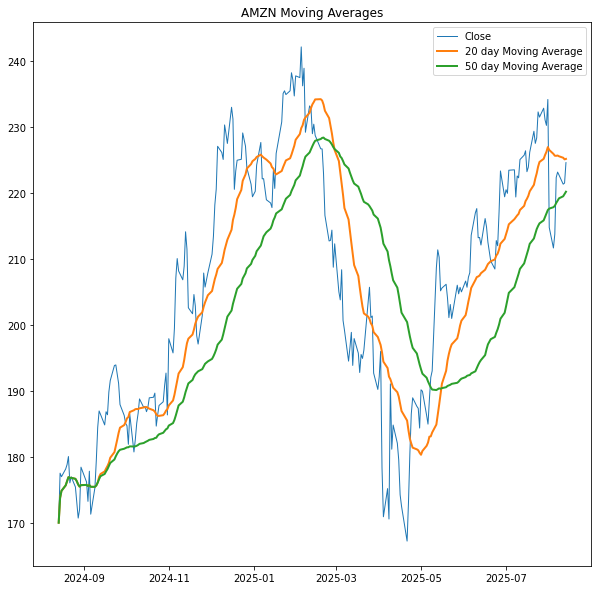

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(price_data.index,price_data['Close'],label="Close",linewidth=1)
plt.plot(price_data.index,price_data['MA_20'],label="20 day Moving Average", linewidth = 2)
plt.plot(price_data.index,price_data['MA_50'],label="50 day Moving Average",linewidth=2)

plt.legend()
plt.title("AMZN Moving Averages")

plt.show()

Note that the blue line here (close price) is jagged and indicates a lot of daily fluctuation. The orange line (20 day MA) is smoother than Close price and follows trends much quicker. The 50 day MACD is the smoothest and reacts the most slowly to daily changes. 

When the 20 day MA crosses *above* the 50 day MA, it means that the short term trend is proving to be more bullish than long-term. This indicates the trend might be shifting upward -> BUY signal.

Similarly, when the 20 day MA crosses *below* the 50 day MA, it means that the short term trend is more bearish than long-term -> SELL signal. 

We will use this simple logic to indicate BUY/SELL for now.

You might be wondering: why not 'buy the dip'? That's because at least using these limited metrics, it's hard to predict whether it's simply a 'dip' or a true decline (in which case...bye bye, bank balance). So we stick with buying at the start of an upward trend. Sure, you might lose some bucks, but as Warren Buffet wisely said, "I like to shoot fish in a barrel. But I like to do it after the water has run out."

In [47]:
price_data['MA_20_above_50'] = price_data['MA_20'] > price_data['MA_50']

price_data["yesterday_above"] = price_data['MA_20_above_50'].shift(1)

price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,MA_20,MA_50,MA_20_above_50,yesterday_above
Date,,,,,,,,,,,,
2024-08-14 00:00:00-04:00,172.110001,172.279999,168.860001,170.100006,28843800,0.0,0.0,-2.009995,170.100006,170.100006,False,NaN
2024-08-15 00:00:00-04:00,174.860001,177.910004,173.990005,177.589996,51698500,0.0,0.0,2.729996,173.845001,173.845001,False,False
2024-08-16 00:00:00-04:00,177.039993,178.339996,176.259995,177.059998,31489200,0.0,0.0,0.020004,174.916667,174.916667,False,False
2024-08-19 00:00:00-04:00,177.639999,178.300003,176.160004,178.220001,31129800,0.0,0.0,0.580002,175.742500,175.742500,False,False
2024-08-20 00:00:00-04:00,177.919998,179.009995,177.429993,178.880005,26255200,0.0,0.0,0.960007,176.370001,176.370001,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,221.000000,226.220001,220.820007,223.130005,40603500,0.0,0.0,2.130005,225.634000,218.798001,True,True
2025-08-08 00:00:00-04:00,223.139999,223.800003,221.880005,222.690002,32970500,0.0,0.0,-0.449997,225.517500,219.157401,True,True
2025-08-11 00:00:00-04:00,221.779999,223.050003,220.399994,221.300003,31646200,0.0,0.0,-0.479996,225.298000,219.469401,True,True


In [48]:
# if((price_data["MA_20_above_50"]==False) & (price_data["yesterday_above"]==True)):
#     price_data["Signal"]="SELL"
# elif((price_data["MA_20_above_50"]==True) & (price_data["yesterday_above"]==False)):
#     price_data["Signal"]="BUY"
# price_data

In [52]:
price_data["Signal"]="HOLD"


In [55]:
sell_condition=(price_data["MA_20_above_50"]=="False") & (price_data["yesterday_above"]=="True")
buy_condition=(price_data["MA_20_above_50"]=="True") & (price_data["yesterday_above"]=="False")

price_data.loc[sell_condition,"Signal"]="SELL"
price_data.loc[buy_condition,"Signal"]="BUY"

price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Change,MA_20,MA_50,MA_20_above_50,yesterday_above,Signal
Date,,,,,,,,,,,,,
2024-08-14 00:00:00-04:00,172.110001,172.279999,168.860001,170.100006,28843800,0.0,0.0,-2.009995,170.100006,170.100006,False,NaN,HOLD
2024-08-15 00:00:00-04:00,174.860001,177.910004,173.990005,177.589996,51698500,0.0,0.0,2.729996,173.845001,173.845001,False,False,HOLD
2024-08-16 00:00:00-04:00,177.039993,178.339996,176.259995,177.059998,31489200,0.0,0.0,0.020004,174.916667,174.916667,False,False,HOLD
2024-08-19 00:00:00-04:00,177.639999,178.300003,176.160004,178.220001,31129800,0.0,0.0,0.580002,175.742500,175.742500,False,False,HOLD
2024-08-20 00:00:00-04:00,177.919998,179.009995,177.429993,178.880005,26255200,0.0,0.0,0.960007,176.370001,176.370001,False,False,HOLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,221.000000,226.220001,220.820007,223.130005,40603500,0.0,0.0,2.130005,225.634000,218.798001,True,True,HOLD
2025-08-08 00:00:00-04:00,223.139999,223.800003,221.880005,222.690002,32970500,0.0,0.0,-0.449997,225.517500,219.157401,True,True,HOLD
2025-08-11 00:00:00-04:00,221.779999,223.050003,220.399994,221.300003,31646200,0.0,0.0,-0.479996,225.298000,219.469401,True,True,HOLD


In [54]:
price_data["Signal"].values

array(['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'BUY', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD',
       

In [56]:
print("Signal summary:")
print(price_data['Signal'].value_counts())

# Show actual signal dates
signals = price_data[price_data['Signal'] != 'HOLD']
print(f"\nFound {len(signals)} trading signals:")
print(signals[['Close', 'MA_20', 'MA_50', 'Signal']].head(10))

Signal summary:
HOLD    247
BUY       2
SELL      1
Name: Signal, dtype: int64

Found 3 trading signals:
                                Close       MA_20       MA_50 Signal
Date                                                                
2024-09-12 00:00:00-04:00  187.000000  177.020000  176.690476    BUY
2025-02-28 00:00:00-05:00  212.279999  226.440499  226.597200   SELL
2025-05-16 00:00:00-04:00  205.589996  191.127499  190.454200    BUY


As you can see our BUY/SELL signals coincide with the chart we sketched out earlier. Now for the fun part–let's see how much $$ this strategy made!!

In [57]:
#starting w 10k

#Initial Portfolio State
starting_cash=10000
cash=starting_cash
shares=0
portfolio_values=[]

for date, row in price_data.iterrows():
    signal=row["Signal"]
    price=row["Close"]
    
    if signal=="BUY":
        shares=cash/price
        cash-=shares*price
    elif signal=="SELL":
        cash+=shares*price
        shares=0
        
    portfolio_value = cash + shares * price
    portfolio_values.append(portfolio_value)
        
        
price_data['Portfolio_Value'] = portfolio_values


In [58]:
#Final price

#Get last row as df
print(price_data[['Close', 'Portfolio_Value', 'Signal']].tail(1))

                                Close  Portfolio_Value Signal
Date                                                         
2025-08-13 00:00:00-04:00  224.559998              0.0   HOLD


In [59]:
# Debug your portfolio tracking
print("Final values:")
print(f"Cash: ${cash}")
print(f"Shares: {shares}")
print(f"Last price: ${price_data['Close'].iloc[-1]}")
print(f"Portfolio value: ${price_data['Portfolio_Value'].iloc[-1]}")

# Check a few portfolio values
print("\nSample portfolio values:")
print(price_data[['Close', 'Signal', 'Portfolio_Value']].tail(10))

Final values:
Cash: $0.0
Shares: 0.0
Last price: $224.55999755859375
Portfolio value: $0.0

Sample portfolio values:
                                Close Signal  Portfolio_Value
Date                                                         
2025-07-31 00:00:00-04:00  234.110001   HOLD              0.0
2025-08-01 00:00:00-04:00  214.750000   HOLD              0.0
2025-08-04 00:00:00-04:00  211.649994   HOLD              0.0
2025-08-05 00:00:00-04:00  213.750000   HOLD              0.0
2025-08-06 00:00:00-04:00  222.309998   HOLD              0.0
2025-08-07 00:00:00-04:00  223.130005   HOLD              0.0
2025-08-08 00:00:00-04:00  222.690002   HOLD              0.0
2025-08-11 00:00:00-04:00  221.300003   HOLD              0.0
2025-08-12 00:00:00-04:00  221.470001   HOLD              0.0
2025-08-13 00:00:00-04:00  224.559998   HOLD              0.0
